# import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mobile_data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Mobile%20Price%20Classification/train.csv?raw=true')

In [3]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

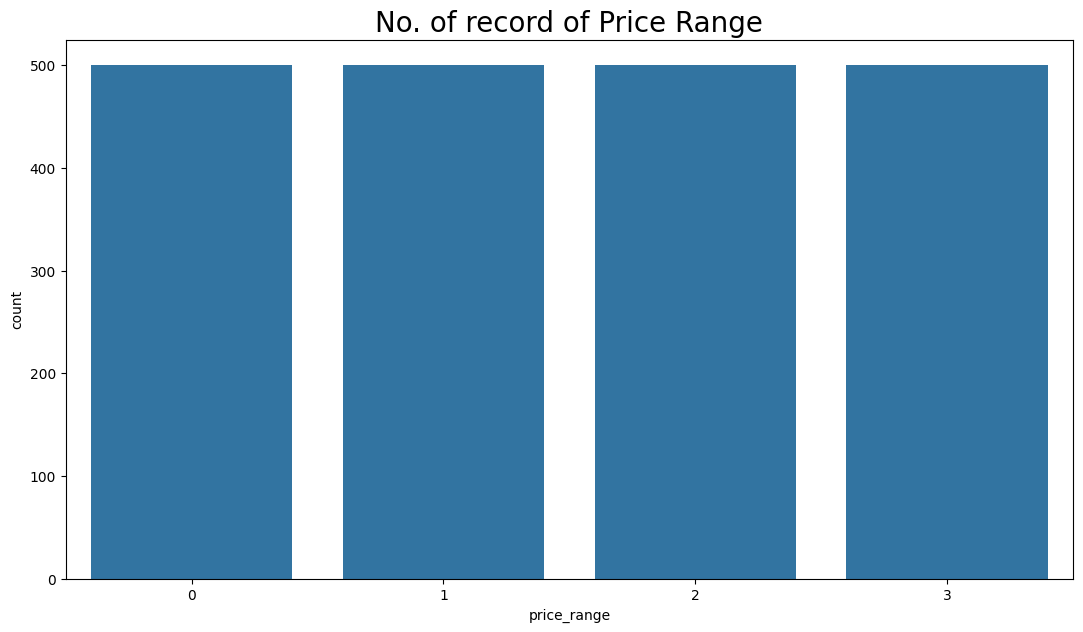

In [6]:
plt.figure(figsize=(13,7))
sns.countplot(data=mobile_data,x='price_range')
plt.title('No. of record of Price Range',size=20)
plt.show()

In [7]:
mobile_corr = mobile_data.corr()

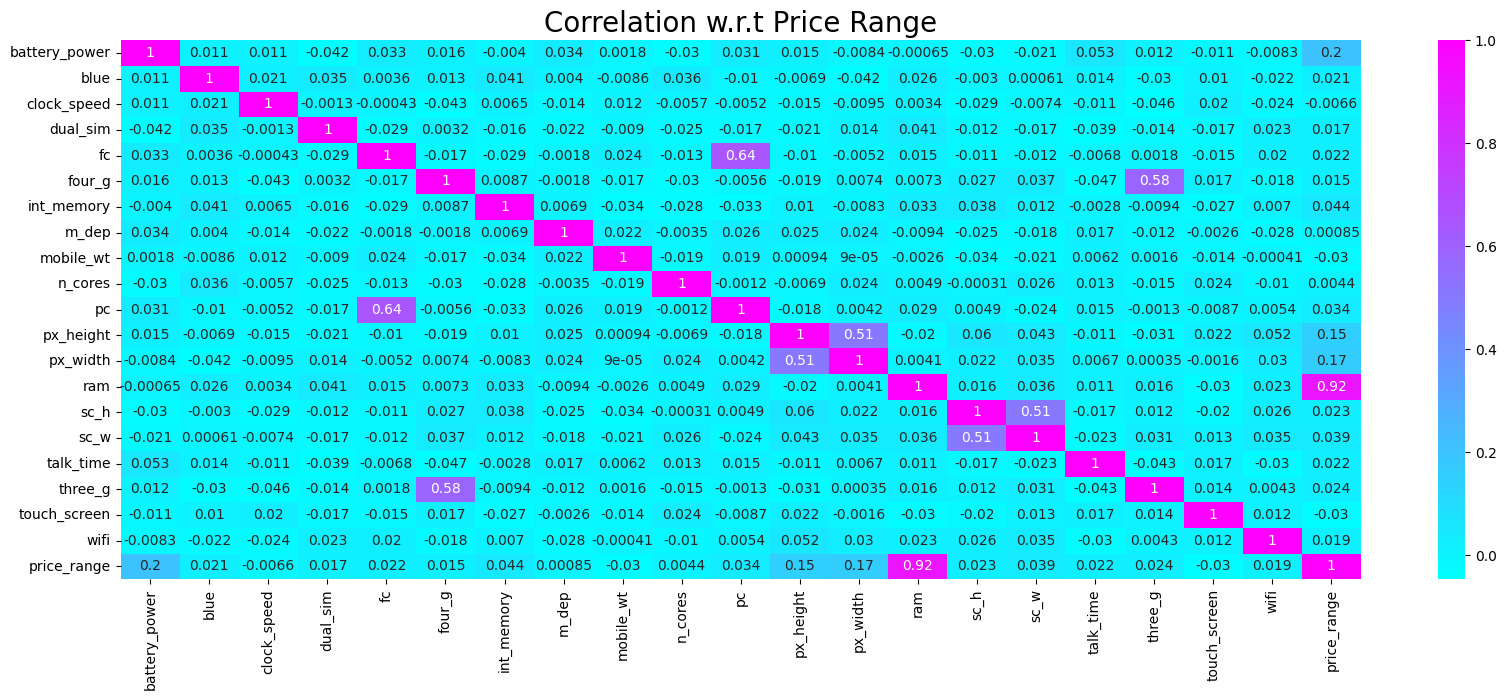

In [8]:
plt.figure(figsize=(20,7))
sns.heatmap(mobile_corr,cmap='cool',annot=True)
plt.title('Correlation w.r.t Price Range',size=20)
plt.show()

In [9]:
X = mobile_data.drop('price_range',axis=1)

In [10]:
Y = mobile_data['price_range']

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)

In [13]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
predictions = knn_model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.93      0.88      0.90       108
           2       0.89      0.94      0.91       114
           3       0.95      0.95      0.95        84

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [16]:
print(confusion_matrix(predictions,Y_test))

[[ 90   4   0   0]
 [  4  95   9   0]
 [  0   3 107   4]
 [  0   0   4  80]]


In [17]:
error = []

for k in range(2,50):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,Y_train)
  predictions = knn_model.predict(X_test)
  e = np.mean(predictions != Y_test)
  error.append(e)

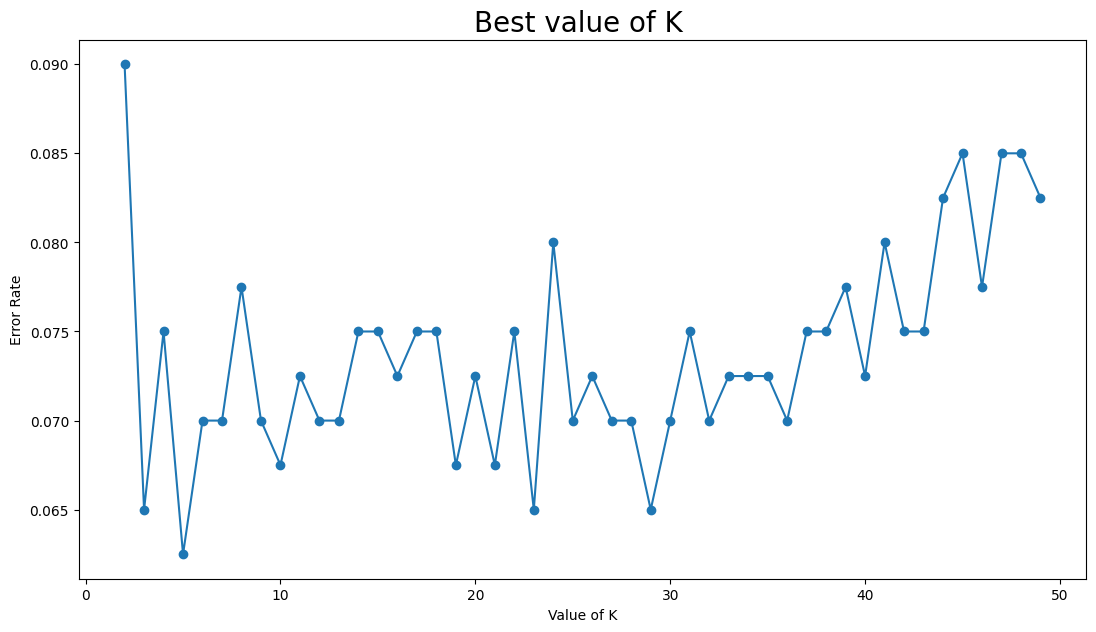

In [18]:
plt.figure(figsize=(13,7))
plt.plot(range(2,50),error ,marker='o')
plt.title('Best value of K ',size=20)
plt.xlabel('Value of K')
plt.ylabel('Error Rate')
plt.show()

In [19]:
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [20]:
temp_df = pd.DataFrame(data=[range(2,50),error])

In [21]:
temp_df = temp_df.T

In [22]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [23]:
mobile_test_data = pd.read_csv('https://github.com/sukhioo7/dataset/blob/main/Mobile%20Price%20Classification/test.csv?raw=True')

In [24]:
mobile_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [26]:
knn_model.predict([[2575,1,1200,1,0,0,0,15.4,150,1,0.3,160,128,0.2,123,53,10,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array([0])

In [25]:
mobile_test_data.drop('id',axis=1,inplace=True)